# 10. Logistic Regression

## 10.3 Multinomial logistic regression

### 10.3.1 Linear and nonlinear classifiers

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [96]:
rng = np.random.default_rng()

N = 100
cov = 0.01 * np.eye(2)
means = [
    [0.5, 0.5], [-0.5, -0.5], # class 1
    [0.5, -0.5], [-0.5, 0.5], # class 2
    [0.0, 0.0] # class 3
]
X = np.concatenate([np.random.multivariate_normal(m, cov, size=N) for m in means])
y = np.ravel(np.transpose(np.array([1, 1, 2, 2, 3]) * np.ones((100, 1))))
n_classes = len(np.unique(y))
X.shape, y.shape, n_classes

((500, 2), (500,), 3)

#### Figure 10.7: Example of 3-class logistic regression with 2d inputs. (a) Original features. (b) Quadratic features.

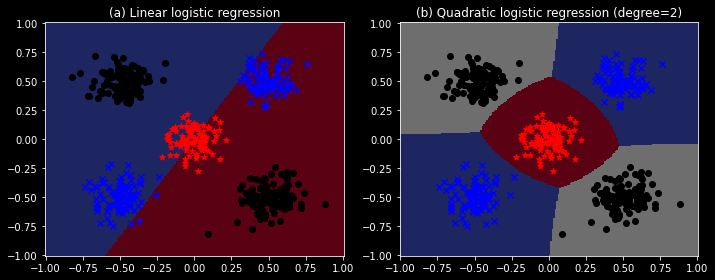

In [97]:
def plotScatter(X0, X1, y, ax):
    for x0, x1, cls in zip(X0, X1, y):
        colors = ['blue', 'black', 'red']
        markers = ['x', 'o', '*']
        color = colors[int(cls) - 1]
        marker = markers[int(cls) - 1]
        ax.scatter(x0, x1, marker=marker, color=color)

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

clf = LogisticRegression(penalty='none', multi_class='multinomial', solver='lbfgs')
transformer = PolynomialFeatures(2)

n_grid = 200
xx, yy = np.meshgrid(np.linspace(-1, 1, n_grid), np.linspace(-1, 1, n_grid))
grid = np.c_[xx.ravel(), yy.ravel()]

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))

# Linear logistic regression
clf.fit(X, y)
Z = clf.predict(grid).reshape(xx.shape)
ax1.pcolormesh(xx, yy, Z, cmap='coolwarm', alpha=0.5)

# Quadratic logistic regression
clf.fit(transformer.fit_transform(X)[:, 1:], y) # skip the constant term
Z = clf.predict(transformer.transform(grid)[:, 1:]).reshape(xx.shape)
ax2.pcolormesh(xx, yy, Z, cmap='coolwarm', alpha=0.5)

# https://stackoverflow.com/questions/40601997/setting-discrete-colormap-corresponding-to-specific-data-range-in-matplotlib
# cmap = plt.cm.get_cmap("jet", lut=nclasses)
# cmap_bounds = np.arange(nclasses+1) - 0.5
# norm = mcol.BoundaryNorm(cmap_bounds, cmap.N)
# plt.pcolormesh(xx, yy, Z, cmap=cmap, norm=norm)

plotScatter(X[:, 0], X[:, 1], y, ax1)
plotScatter(X[:, 0], X[:, 1], y, ax2)
ax1.set_title('(a) Linear logistic regression')
ax2.set_title('(b) Quadratic logistic regression (degree=2)')

fig.tight_layout()

### Multi-label classification

In [186]:
from sklearn.datasets import make_multilabel_classification
n_classes, length = 3, 50
X, y = make_multilabel_classification(
    n_samples=length * n_classes, n_features=2, n_classes=n_classes, n_labels=1, length=length,
    allow_unlabeled=False, return_distributions=False
)
X.shape, y.shape, np.unique(y)

((150, 2), (150, 3), array([0, 1]))

In [187]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X, y)
clf.score(X, y)

0.26666666666666666

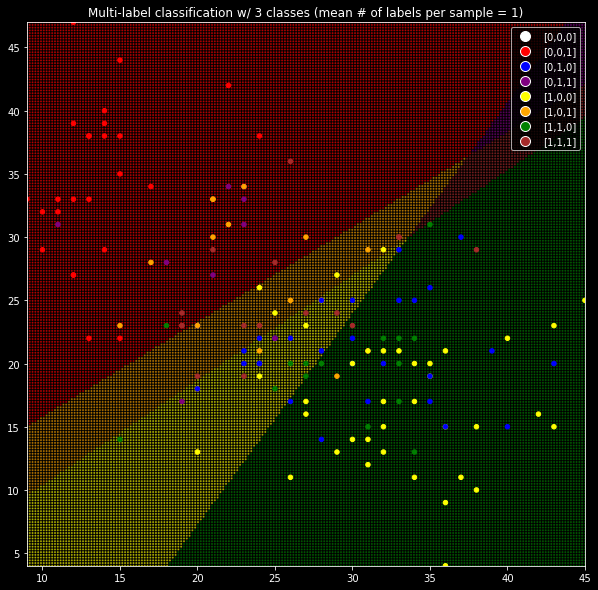

In [195]:
# [0, 0, 1] red, [0, 1, 0] blue, [1, 0, 0] yellow
# [0, 1, 1] red + blue = purple, [1, 0, 1] red + yellow = orange, [1, 1, 0] blue + yellow = green
# [0, 0, 0] white, [1, 1, 1] red + blue + yellow = brown
COLORS = np.array(['white', 'red', 'blue', 'purple', 'yellow', 'orange', 'green', 'brown'])
LABELS = ['[0,0,0]', '[0,0,1]', '[0,1,0]', '[0,1,1]', '[1,0,0]', '[1,0,1]', '[1,1,0]', '[1,1,1]']

from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', linestyle='', label=label, markerfacecolor=c, markersize=10)
    for c, label in zip(COLORS, LABELS)
]

n_grid = 200
x0_min, x1_min = X.min(axis=0)
x0_max, x1_max = X.max(axis=0)
xx, yy = np.meshgrid(np.linspace(x0_min, x0_max, n_grid), np.linspace(x1_min, x1_max, n_grid))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = clf.predict(grid)

_, ax = plt.subplots(figsize=(10, 10))
ax.scatter(
    grid[:, 0], grid[:, 1],
    s = 5, marker='.', alpha=0.5,
    color=COLORS.take((Z * [4, 2, 1]).sum(axis=1))
)
ax.scatter(
    X[:, 0], X[:, 1],
    s = 20, marker='o',
    color=COLORS.take((y * [4, 2, 1]).sum(axis=1))
)
ax.set_xlim((x0_min, x0_max))
ax.set_ylim((x1_min, x1_max))
ax.set_title(f"Multi-label classification w/ {n_classes} classes (mean # of labels per sample = 1)")
ax.legend(handles=legend_elements, loc='upper right');
